## Pet Friendly Travels

### An analysis of pet friendly accommodation listings published on Airbnb.
— December 2015 —

The impetus for the analysis came from planning a road trip around Europe. This time I’m going to take my dog with me. Will it be a headache to find a place to stay? From this question I moved further and enquired whether pets are equally welcomed in different parts of the world. 

This notebook describes some analysis of the data I gathered on Airbnb.com. The goal was to find the most pet friendly countries to travel with a pet based on ease of accommodation search.

I'll begin with a summary of what I think I've learned about countries' attitude to pets based on their willingness to host one.  Then I'll walk you through the analysis process. 

### Summary

* There are 1.9 million listings all over the world on Airbnb, 21% of which allow to stay with a pet.  
* These 5 countries account for 56.37% of all pet friendly listings (PFL) on Airbnb:  
  1. Italy (18.58%)
  2. USA (14.32%)
  3. France (11.42%)
  4. Spain (7.77%)
  5. Croatia (4.28%)


To equalize countries I used ratio of PFL to all listings as a main criteria for comparison. The map shows how countries vary in their attitude to pets.

#### Ratio of Pet Friendly Listings

![Choropleth map](files/map_pfl_201512.jpg)

* Andorra is the most welcoming country in the world with 46% of 405 listings willing to host a pet.
* Japan might be popular for the lovely Shiba Inu dog breed but not for willingness to accommodate a dog. Only 4% of listings would suit a pet owner. 
* 96% of hosts in Kazakhstan would also prefer to keep pets outdoors. 
* Europe is the easiest region to travel with a pet. The highest ratio of PFL (0.24) is recorded in this region. 63% of all PFL are located here as well.  

The bar chart shows the distribution of listings (total and PFL) and ratio of PFL in each region.

![Bar chart](files/bar_chart_pfl_201512.jpg)

* Asia and Oceania would be less suitable for travelling pets. Only 14% of listings there are pet friendly. 

* North America doesn't stand out as the friendly region for a pet owner but as the most expensive region.

The box-and-whisker plot shows the distribution of prices for PFL in regions. 

![Box plot](files/box_plot_pfl_201512.jpg)

* Prices for a PFL in 50% of countries in North America (above median) would be higher than in the most expensive countries in Africa, Europe and Oceania.

* In Asia, hosts could be accused of price discrimination. Pet allowance increases the average price by 41% reaching $110.

I'll keep this findings in mind when planning my road trip!

Now I'll show you the code behind the above revelations. 

#### Preliminaries
The first thing we need to do is to import Python libraries — pandas and matplotlib. I also use the humanize library to convert large numbers to a friendly text representation.

In [2]:
from __future__ import division
from IPython.display import display
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import humanize

I'll skip the data gathering step. I used a CSV file with the list of countries and regions to parse Airbnb.com website and saved the data as a sqlite dictionary. That is why I use the sqlitedict library here.

In [3]:
from sqlitedict import SqliteDict
db = SqliteDict('./pet_friendly.sqlite')

I'll also format floating point numbers.

In [4]:
pd.set_option('float_format', '{:.2f}'.format)

### Data overview
Next we read in data from the database and take a look at what we're working with.

In [5]:
def read_db_in_pandas(db):
    """ Read the DB."""
    # Transpose data to have keys as index.
    df = pd.DataFrame(dict(db)).T

    # Remove rows with no data for a country.
    df = df[df['apt_total'] != 0]

    # Convert columns into numbers.
    df = df.convert_objects(convert_numeric=True)
    
    return df

df = read_db_in_pandas(db)
print ("There are {0} countries in the dataset."
       .format(len(db)))
print ("{0} countries have no listings published."
       .format(len(db) - len(df)))
print ("We are left with {0} countries for closer examination."
       .format(len(df)))
print "\nBelow is a random sample of the DataFrame:"
df.sample(n=5)

There are 249 countries in the dataset.
18 countries have no listings published.
We are left with 231 countries for closer examination.

Below is a random sample of the DataFrame:


,apt_pets,apt_pets_price,apt_total,apt_total_price,country_code,region
Italy,73367,81.00,195694,83.00,ITA,Europe
Mayotte,3,47.00,43,55.00,MYT,Africa
Palestine,16,46.00,80,38.00,PSE,Asia
Jersey,2,93.00,38,102.00,JEY,Europe
Zambia,5,52.00,49,60.00,ZMB,Africa


I collected data on total number of listings located in each country ('apt_total') and number of pet friendly listings ('apt_pets'), or in short PFL.  
I also parsed the average price per night in both categories ('apt_total_price' & 'apt_pets_price'). 
Prices are in USD.

### World listings overview

Let's explore the world!

In [6]:
# Number of listings.
apt_sum = df['apt_total'].sum()

# Number of PFL.
pets_sum = df['apt_pets'].sum()

print ("There are {0} listings all over the world on Airbnb."
       .format(humanize.intword(apt_sum)))
print ("Pets would be welcomed only in {0:.0%} of all listings."
       .format(pets_sum / apt_sum))

There are 1.9 million listings all over the world on Airbnb.
Pets would be welcomed only in 21% of all listings.


In [7]:
# Average price per night.
price_mean = round(df['apt_total_price'].mean())
pet_mean = round(df['apt_pets_price'].mean())

# Difference in price.
diff = (price_mean - pet_mean) / price_mean
    
print ("The average price for a listing is ${0} per night."
       .format(int(price_mean)))
print ("A PFL would cost {0:.0%} less, or ${1}."
       .format(diff, int(pet_mean)))

The average price for a listing is $126 per night.
A PFL would cost 10% less, or $114.


A quick glance at the whole dataset reveals that countries with few listings do not tell much about their attitude towards pets. Let's look at the top-5 friendliest countries.

In [8]:
# Ratio of PFL 
compare = df['apt_pets']/df['apt_total']
compare.sort(ascending=False)
print "The friendliest countries:"
compare[:5]

The friendliest countries:


Western Sahara              1.00
Wallis and Futuna           1.00
Saint Pierre and Miquelon   0.80
Guinea                      0.62
Antarctica                  0.59
dtype: float64

This chart tells us that 100% of listings in Western Sahara and Wallis and Futuna are pet friendly. But that's only because there is only one listing in the country, and pets are allowed there.

In [9]:
df.loc[['Western Sahara', 'Wallis and Futuna']][['apt_total', 'apt_pets']]

,apt_total,apt_pets
Western Sahara,1,1
Wallis and Futuna,1,1


Is Antarctica in the top-5 chart? Do penguins rent out their nests?  
Apparently, there's some mistake on Airbnb. 17 listings located in different parts of the globe were mistakenly marked off as based in Antarctica.

I'll fix the dataset a bit for further analysis. I'll add a threshold of 20 listings and remove Antarctica.

In [10]:
# Add a threshold of 20 listings.
df_cut = df[df['apt_total'] > 20]

# Remove Antarctica.
df_cut = df_cut[df_cut.index != 'Antarctica']

print ("These changes leave us {0} countries to examine."
       .format(len(df_cut)))

# Calculate ratio of PFL and add to the DataFrame.
df_cut['apt_ratio'] = (df_cut['apt_pets'] / df_cut['apt_total'])

print "\nTop-5 countries with the highest ratio of PFL:"
df_cut.sort('apt_ratio', ascending=False)[['apt_ratio', 'apt_total', 'apt_pets', 'region']][:5]

These changes leave us 187 countries to examine.

Top-5 countries with the highest ratio of PFL:


,apt_ratio,apt_total,apt_pets,region
Andorra,0.46,405,186,Europe
Burkina Faso,0.38,55,21,Africa
Italy,0.37,195694,73367,Europe
Slovakia,0.37,919,343,Europe
El Salvador,0.37,352,131,North America


Andorra is the most welcoming country with 46% of 405 listings willing to accommodate a pet.  

Though Italy is lagging behind in ratio comparison with 37% share of PFL, in raw numbers this country overtakes Andorra. Italy provides almost 400 times more PFL than Andorra. But Italy is also 640 times bigger in its size. 

To equalize countries I'll use ratio of listings as a main criteria for comparison. 

Let's look at the bottom-5 countries.

In [11]:
print "Bottom-5 countries with the lowest ratio of PFL: "
df_cut.sort('apt_ratio')[['apt_ratio', 'apt_total', 'apt_pets', 'region']][:5]

Bottom-5 countries with the lowest ratio of PFL: 


,apt_ratio,apt_total,apt_pets,region
Northern Mariana Islands,0.02,42,1,Oceania
Cook Islands,0.02,122,3,Oceania
Anguilla,0.04,186,7,North America
Kazakhstan,0.04,851,35,Asia
Japan,0.04,24106,1071,Asia


Japan might be popular for the lovely Shiba Inu dog breed but not for willingness to accommodate a pet. Only 4% of listings would suit a pet owner. 

It seems that in Oceania and Asia travelling with a pet can be challenging. Let's examine regions in detail.

### Regions overview
I'll group data by regions and compare their performance not only in percent of PFL but also in price difference.

In [12]:
print ("Number of countries in the dataset "
       "grouped by region:")
df_cut.groupby(['region']).size()

Number of countries in the dataset grouped by region:


region
Africa           34
Asia             42
Europe           48
North America    40
Oceania          10
South America    13
dtype: int64

First, I'll look at the distribution of accommodation listings among regions.

In [13]:
# All listings
region_total = (df_cut['apt_total']
                   .groupby(df_cut['region']).sum()
                   / df_cut['apt_total'].sum())
# PFL listings
region_pets = (df_cut['apt_pets']
               .groupby(df_cut['region']).sum()
               / df_cut['apt_pets'].sum())

# PFL ratio
region_ratio = (df_cut['apt_pets']
                   .groupby(df_cut['region']).sum()
                    / df_cut['apt_total']
                   .groupby(df_cut['region']).sum())

region_listings = pd.concat([region_total, region_pets],
                            axis=1)
region_listings['ratio'] = region_ratio

print "Share of regions in Airbnb listings: "
region_listings.sort('apt_total', ascending=False)

Share of regions in Airbnb listings: 


,apt_total,apt_pets,ratio
region,,,
Europe,0.54,0.63,0.24
North America,0.22,0.20,0.18
Asia,0.12,0.08,0.14
South America,0.05,0.05,0.20
Oceania,0.04,0.02,0.14
Africa,0.02,0.02,0.19


It seems, Airbnb is very popular in Europe. I'll plot the data.

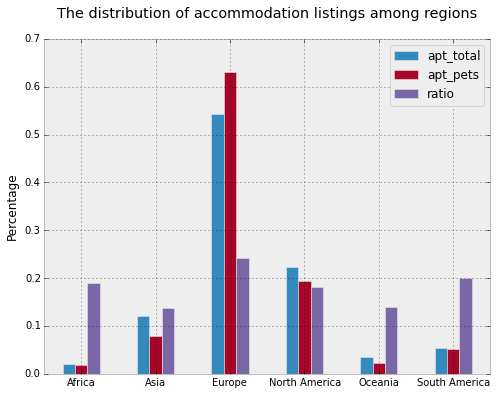

In [14]:
# Make a bar chart
matplotlib.style.use('bmh')

plt.figure();
region_listings.plot(kind='bar', rot=0, figsize=(8, 6))
plt.xlabel('')
plt.ylabel('Percentage')
plt.title('The distribution of accommodation ' 
          'listings among regions \n')
plt.show()

The plot and the table above reveal that the highest percentage of Airbnb listings (54%) are located in Europe. 63% of PFL are located in Europe. The highest ratio of PFL (0.24) is recorded in Europe as well.

North America lags behind with 22% share of listings. 18% of hosts in this region would be happy to accommodate a pet.

South America and Africa, though poorly represented on Airbnb, are very welcoming in hosting pets. 20% of hosts open their doors to pet owners.

Asia and Oceania prove themselves as less suitable for travelling pets. Just 14% of their listings are pet friendly. 

Not only listings are distributed unevenly. The average price per night differs greatly in each region.

In [15]:
# Mean price per region
region_price = df_cut.groupby(df_cut['region']).mean()[['apt_total_price', 
                                         'apt_pets_price']]

# Calculate ratio of PFL price to general listing price. 
region_price['ratio'] = (region_price['apt_pets_price'] / 
                         region_price['apt_total_price'])

print "Average price in region, USD."
print "Ratio of PFL price to average price."
region_price.sort('apt_total_price')

Average price in region, USD.
Ratio of PFL price to average price.


,apt_total_price,apt_pets_price,ratio
region,,,
South America,66.23,70.92,1.07
Africa,69.44,67.15,0.97
Asia,78.19,110.14,1.41
Europe,86.98,100.12,1.15
Oceania,120.20,136.60,1.14
North America,268.55,172.65,0.64


The cheapest region in terms of accommodation is South America. On average, day rent would cost \$66. Though the cheapest stay with a pet would be possible in Africa, just \$67 a night.

In Asia, price for a listing is rather low and equals \$78 a night, however pet allowance adds 41% to the average price and reaches \$110. That's more expensive than a PFL in Europe. 

In Europe, stay with a pet would cost \$100, or 15% more than the average price per night. But in any case this price is lower than in Oceania and North America. 

North America is the most expensive region to rent an apartment. The average price reaches \$268.5. Luxury apartments in this region close doors to pet owners. That lowers the average price for a PFL by 36% but it's still the highest comparing to other regions.

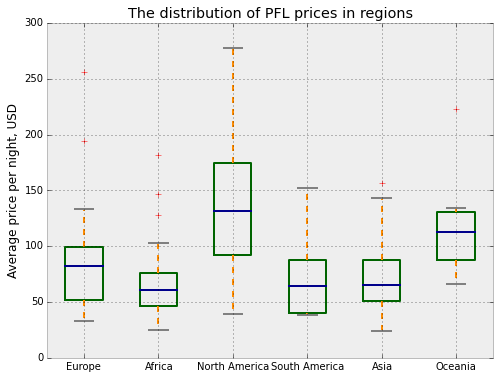

In [16]:
# Make a boxplot
color = dict(boxes='DarkGreen', whiskers='DarkOrange',
             medians='DarkBlue', caps='Gray')
plt.figure();

# Split the data on 'apt_pets_price' into regional groups
region_groups = df_cut.groupby(['region'])[['apt_pets_price']]

# List of regions
regions = df_cut['region'].unique()
data = []

# Add the data from the DF
for item in regions:
        a = region_groups.get_group(item)
        data.append(a)

# Make a new DF for regions
box_df = pd.concat(data, ignore_index=True, axis=1)
box_df.columns = regions

# Plot the data
box_df.plot(kind='box', sym='r+', color=color,
            figsize=(8, 6)).set_ylim([0,300])
plt.ylabel('Average price per night, USD')
plt.title('The distribution of PFL prices in regions')
plt.show()

The box-and-whisker plot shows the distribution of data based on the five number summary: minimum, first quartile, median, third quartile, and maximum. This plot does not include outliers.  

North America stands out as the most expensive region. Prices in this region are spread out over a wide range of values from \$40 to almost \$300.  

Prices for a PFL in 50% of countries in North America (above median) would be higher than in the most expensive countries in Africa, Europe and Oceania. 

Africa and Oceania are the most homogeneous regions. Prices do not differ greatly within each region.  

Other observation is that in South America 50% of countries below the median are very uniform in listing prices and other half above the median, on the contrary, is widely distributed.  

The mentioned wide distribution in the top (or most expensive) part of the box (above the third quartile) is true for all regions except Oceania. Oceania is uniform when it comes to high prices. 

### Country overview
Ok, so now we know that Europe is a region to go with a pet. It provides the biggest number of listings for a reasonable price, quarter of which accept pets, though price would be higher for a pet friendly place. 
But let's examine the country level and find leaders in every region. 

In [17]:
# Share of each country in total listings
apt_share = (df_cut['apt_total'] / df_cut['apt_total'].sum() * 100).round(2)
apt_share.sort(ascending=False)

# Count 80% of countries
quantile_count = int(len(df_cut) * 0.80)

print ("80%, or {0} countries in the dataset "
       "account for {1}% of all listings available."
       .format(quantile_count, apt_share[-1*quantile_count: ].sum()))

80%, or 149 countries in the dataset account for 10.51% of all listings available.


In [18]:
print ("These 5 countries account for {0}% "
       "of all listings published on Airbnb: "
        .format(apt_share[:5].sum()))
apt_share[:5]

These 5 countries account for 49.56% of all listings published on Airbnb: 


United States of America   16.48
France                     12.18
Italy                      10.38
Spain                       6.40
United Kingdom              4.12
Name: apt_total, dtype: float64

The same calculations for PFL reveal even lower numbers.

In [19]:
# Share of each country in PFL
pet_share = (df_cut['apt_pets'] / 
             df_cut['apt_pets'].sum() * 100).round(2)

pet_share.sort(ascending=False)

print ("80%, or {0} countries represent just "
       "{1}% of PFL.".format(quantile_count, 
                           pet_share[-1 * quantile_count: ].sum()))

80%, or 149 countries represent just 8.5% of PFL.


In [20]:
print ("These 5 countries account for {0}% "
       "of all listings published on Airbnb: "
        .format(pet_share[:5].sum()))
pet_share[:5]

These 5 countries account for 56.37% of all listings published on Airbnb: 


Italy                      18.58
United States of America   14.32
France                     11.42
Spain                       7.77
Croatia                     4.28
Name: apt_pets, dtype: float64

I'll plot countries that account for more than 1% of PFL.

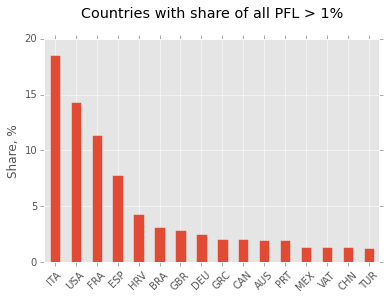

In [21]:
# Add country codes to the DF.
pet_share_df = pd.concat(
                    [pet_share, df['country_code']], 
                    axis=1).set_index('country_code').sort('apt_pets', 
                                                        ascending=False)
# Make a bar chart
matplotlib.style.use('ggplot')
plt.figure();
share_plot = pet_share_df[pet_share_df['apt_pets']>1].plot(kind='bar',
                                                        legend=False,
                                                        rot=45, 
                                                        title='Countries with share of all PFL > 1%\n')
                                                            
                                                    
share_plot.set_ylabel('Share, %')
share_plot.set_xlabel('')
plt.show()

But, again, these are raw numbers. I'll show the top 5 most friendly countries in each region.

In [22]:
for region in regions:
    print ("Top-5 friendliest countries in {}:"
           .format(region))
    display(df_cut[df_cut['region'] == region].sort('apt_ratio', ascending=False)[['apt_ratio']][:5])

Top-5 friendliest countries in Europe:


,apt_ratio
Andorra,0.46
Italy,0.37
Slovakia,0.37
Slovenia,0.36
Greece,0.34


Top-5 friendliest countries in Africa:


,apt_ratio
Burkina Faso,0.38
Togo,0.35
Angola,0.33
Benin,0.31
Senegal,0.30


Top-5 friendliest countries in North America:


,apt_ratio
El Salvador,0.37
Haiti,0.30
Nicaragua,0.29
Dominican Republic,0.25
Panama,0.25


Top-5 friendliest countries in South America:


,apt_ratio
Uruguay,0.31
Colombia,0.23
French Guiana,0.22
Brazil,0.22
Venezuela,0.19


Top-5 friendliest countries in Asia:


,apt_ratio
Lao People's Democratic Republic,0.28
Saudi Arabia,0.28
Sri Lanka,0.26
Georgia,0.24
Kuwait,0.24


Top-5 friendliest countries in Oceania:


,apt_ratio
Norfolk Island,0.23
French Polynesia,0.15
Vanuatu,0.15
Australia,0.14
Fiji,0.14


I'll map the ratio of PFL. First, I'll split the data into clusters using k-means. I have a module to choose the number of k. 

Here I plot the sum of squared errors (between each point and the mean of its cluster) as a function of k and look at where the graph “bends”.

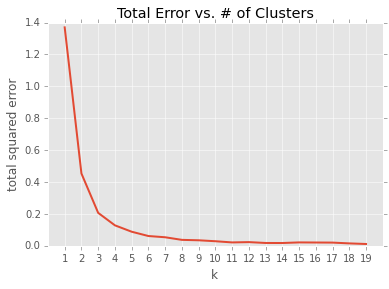

In [23]:
import choosing_k as chk
data = df_cut['apt_ratio'].values.tolist()
chk.plot_errors(data)

It looks like 5 would be a right number of clusters. 

Now I use another module to split the data into 5 clusters.

In [29]:
import kmeans_calc as kmn
threshold_scale = [0.0] + kmn.split_into_groups(data, 5)
threshold_scale

In cluster #0 we have 24 countries. Values range: (0.0238, 0.0786).
In cluster #1 we have 37 countries. Values range: (0.08, 0.1256).
In cluster #2 we have 47 countries. Values range: (0.1354, 0.1933).
In cluster #3 we have 49 countries. Values range: (0.196, 0.2692).
In cluster #4 we have 30 countries. Values range: (0.2718, 0.4593).


[0.0, 0.0786, 0.1256, 0.1933, 0.2692, 0.4593]

To map the data I'll use the folium library.

In [30]:
import json
import folium
from folium.utilities import split_six

In [31]:
columns = ['country_code', 'apt_ratio']
color_data = df_cut.set_index(columns[0])[columns[1]].to_dict()

In [32]:
geo_json_data = json.load(open('countries.geo.json'))

In [36]:
from folium.utilities import split_six, color_brewer
from folium.features import ColorScale

m = folium.Map([32, -45], tiles='Mapbox',
               API_key='wrobstory.map-12345678', 
               zoom_start=2)

# Pass own threshold scale
color_domain = threshold_scale

# Choose color
fill_color = 'YlGnBu'
color_range = color_brewer(fill_color, n=len(color_domain))
key_on = 'id'

# I made a fix for the folium library to colour with white countries with no data. 
def get_by_key(obj, key):
    if len(key.split('.')) <= 1:
        return obj.get(key, None)

def color_scale_fun(x):
    try:
        r = [u for u in color_domain if u <= color_data[get_by_key(x, key_on)]]
        return color_range[len(r)]
    except KeyError:
        return '#FFFFFF'

# Make a map
folium.GeoJson(geo_json_data, 
              style_function=lambda feature: {
                  'fillColor': color_scale_fun(feature),
                  'color': 'black',
                  'weight': 1,
                    'legend_name' : 'Unemployment Rate (%)',
                  'fillOpacity': 0.8
              }).add_to(m)

color_scale = ColorScale(color_domain, fill_color, caption="Ratio of pet friendly listings")
m.add_children(color_scale)
print "Ratio of pet friendly listings to all listings"
m

Ratio of pet friendly listings to all listings


This is the map I'm going to use when planning my road trip!